**AIVLE School 미니프로젝트**
### **공공데이터를 활용한 <span style="color:darkgreen">미세먼지 농도</span> 예측**
---

#### **<span style="color:red">[미션 안내]</span>**
* 개인 미션: 미세먼지 농도를 예측하는 머신러닝 모델을 만드세요. <br> ([1-1]부터 [1-2]까지, [2-1]부터 [2-8]까지, [3-1]부터 [3-2]까지 필수 수행, [4-1]부터 선택 수행)
* 조별 미션: 개인 미션 수행한 내용에 대해 토론하여 발표 준비를 해주세요.

#### **<span style="color:red">[데이터 설명]</span>**

* 학습 데이터
    * air_2021.csv : 2021년 미세먼지 데이터
    * weather_2021.csv : 2021년 날씨 데이터
* 테스트 데이터
    * air_2022.csv : 2022년 미세먼지 데이터
    * weather_2022.csv : 2022년 날씨 데이터

# [Step 1] 탐색적 데이터 분석

In [57]:
# 필요한 라이브러리 설치 및 임포트
!pip install pandas

import pandas as pd
import datetime

---

#### **<span style="color:blue">[1-1] air_21, air_22, weather_21, weather_22 데이터 로딩</span>**

In [58]:
# 데이터 로딩

air_21 = pd.read_csv("air_2021.csv", sep=',', index_col = 0, encoding = 'utf-8' )
air_22 = pd.read_csv("air_2022.csv", sep=',', index_col = 0, encoding = 'utf-8' )
weather_21 = pd.read_csv("weather_2021.csv", sep = ',', encoding='cp949')
weather_22 = pd.read_csv("weather_2022.csv", sep = ',', encoding='cp949')

air_21.shape, air_22.shape, weather_21.shape, weather_22.shape

((8760, 12), (2160, 12), (8759, 38), (2160, 38))

#### **<span style="color:blue">[1-2] 필요한 데이터 분석 진행 </span>**

In [59]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
# head, tail, info, plot을 활용한 시각화 등 진행

air_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      8760 non-null   object 
 1   망       8760 non-null   object 
 2   측정소코드   8760 non-null   int64  
 3   측정소명    8760 non-null   object 
 4   측정일시    8760 non-null   int64  
 5   SO2     8648 non-null   float64
 6   CO      8680 non-null   float64
 7   O3      8663 non-null   float64
 8   NO2     8680 non-null   float64
 9   PM10    8655 non-null   float64
 10  PM25    8663 non-null   float64
 11  주소      8760 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 889.7+ KB


In [60]:
weather_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             8759 non-null   int64  
 1   지점명            8759 non-null   object 
 2   일시             8759 non-null   object 
 3   기온(°C)         8759 non-null   float64
 4   기온 QC플래그       0 non-null      float64
 5   강수량(mm)        949 non-null    float64
 6   강수량 QC플래그      1763 non-null   float64
 7   풍속(m/s)        8757 non-null   float64
 8   풍속 QC플래그       2 non-null      float64
 9   풍향(16방위)       8757 non-null   float64
 10  풍향 QC플래그       2 non-null      float64
 11  습도(%)          8759 non-null   int64  
 12  습도 QC플래그       0 non-null      float64
 13  증기압(hPa)       8759 non-null   float64
 14  이슬점온도(°C)      8759 non-null   float64
 15  현지기압(hPa)      8759 non-null   float64
 16  현지기압 QC플래그     0 non-null      float64
 17  해면기압(hPa)      8759 non-null   float64
 18  해면기압 QC플

In [61]:
air_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      2160 non-null   object 
 1   망       2160 non-null   object 
 2   측정소코드   2160 non-null   int64  
 3   측정소명    2160 non-null   object 
 4   측정일시    2160 non-null   int64  
 5   SO2     2139 non-null   float64
 6   CO      2139 non-null   float64
 7   O3      2139 non-null   float64
 8   NO2     2139 non-null   float64
 9   PM10    2122 non-null   float64
 10  PM25    2135 non-null   float64
 11  주소      2160 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 219.4+ KB


In [62]:
weather_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             2160 non-null   int64  
 1   지점명            2160 non-null   object 
 2   일시             2160 non-null   object 
 3   기온(°C)         2160 non-null   float64
 4   기온 QC플래그       0 non-null      float64
 5   강수량(mm)        81 non-null     float64
 6   강수량 QC플래그      382 non-null    float64
 7   풍속(m/s)        2160 non-null   float64
 8   풍속 QC플래그       0 non-null      float64
 9   풍향(16방위)       2160 non-null   int64  
 10  풍향 QC플래그       0 non-null      float64
 11  습도(%)          2160 non-null   int64  
 12  습도 QC플래그       0 non-null      float64
 13  증기압(hPa)       2160 non-null   float64
 14  이슬점온도(°C)      2160 non-null   float64
 15  현지기압(hPa)      2160 non-null   float64
 16  현지기압 QC플래그     0 non-null      float64
 17  해면기압(hPa)      2160 non-null   float64
 18  해면기압 QC플

# [Step 2] 데이터 전처리

#### **<span style="color:blue">[2-1] air_21, air_22 의 '측정일시'를 활용하여 'time' 변수 생성</span>**

* air_21, air_22  각각 '측정일시'를 활용하여 'time'변수 생성
    * 참고: 미세먼지 데이터는 1시-24시, 날씨 데이터는 0시-23시로 구성되어 있습니다. [2-3]에서 미세먼지와 날씨 데이터를 time 기준으로 합치려면 기준이 동일해야 합니다. 미세먼지 데이터에서 time 변수 생성 시 이를 미리 고려(예: air_21['측정일시'] -1)하세요.
* time 변수를 pd.to_datetime으로 데이터 타입 변경
    * 참고: format = '%Y%m%d%H'

In [63]:
air_21['측정일시'] # int64

0       2021100101
1       2021100102
2       2021100103
3       2021100104
4       2021100105
           ...    
8755    2021093020
8756    2021093021
8757    2021093022
8758    2021093023
8759    2021093024
Name: 측정일시, Length: 8760, dtype: int64

In [64]:
air_22['측정일시'] # int64

0       2022010101
1       2022010102
2       2022010103
3       2022010104
4       2022010105
           ...    
2155    2022033120
2156    2022033121
2157    2022033122
2158    2022033123
2159    2022033124
Name: 측정일시, Length: 2160, dtype: int64

In [65]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

air_21['time'] = air_21['측정일시'] -1
air_22['time'] = air_22['측정일시'] -1

air_21['time'] = pd.to_datetime(air_21['time'], format='%Y%m%d%H')
air_22['time'] = pd.to_datetime(air_22['time'], format='%Y%m%d%H')

In [66]:
air_21['time']

0      2021-10-01 00:00:00
1      2021-10-01 01:00:00
2      2021-10-01 02:00:00
3      2021-10-01 03:00:00
4      2021-10-01 04:00:00
               ...        
8755   2021-09-30 19:00:00
8756   2021-09-30 20:00:00
8757   2021-09-30 21:00:00
8758   2021-09-30 22:00:00
8759   2021-09-30 23:00:00
Name: time, Length: 8760, dtype: datetime64[ns]

In [67]:
air_22['time']

0      2022-01-01 00:00:00
1      2022-01-01 01:00:00
2      2022-01-01 02:00:00
3      2022-01-01 03:00:00
4      2022-01-01 04:00:00
               ...        
2155   2022-03-31 19:00:00
2156   2022-03-31 20:00:00
2157   2022-03-31 21:00:00
2158   2022-03-31 22:00:00
2159   2022-03-31 23:00:00
Name: time, Length: 2160, dtype: datetime64[ns]

---

#### **<span style="color:blue">[2-2] weather_21, weather_22 의 '일시'를 활용하여 'time' 변수 생성</span>**

* weather_21, weather_22 의 '일시'를 활용하여 'time'변수 생성
* time 변수를 pd.to_datetime으로 데이터 타입 변경

In [68]:
weather_21['일시']

0       2021-01-01 01:00
1       2021-01-01 02:00
2       2021-01-01 03:00
3       2021-01-01 04:00
4       2021-01-01 05:00
              ...       
8754    2021-12-31 19:00
8755    2021-12-31 20:00
8756    2021-12-31 21:00
8757    2021-12-31 22:00
8758    2021-12-31 23:00
Name: 일시, Length: 8759, dtype: object

In [69]:
weather_22['일시']

0       2022-01-01 00:00
1       2022-01-01 01:00
2       2022-01-01 02:00
3       2022-01-01 03:00
4       2022-01-01 04:00
              ...       
2155    2022-03-31 19:00
2156    2022-03-31 20:00
2157    2022-03-31 21:00
2158    2022-03-31 22:00
2159    2022-03-31 23:00
Name: 일시, Length: 2160, dtype: object

In [70]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

weather_21['time'] = pd.to_datetime(weather_21['일시'])
weather_22['time'] = pd.to_datetime(weather_22['일시'])

In [71]:
weather_21['time']

0      2021-01-01 01:00:00
1      2021-01-01 02:00:00
2      2021-01-01 03:00:00
3      2021-01-01 04:00:00
4      2021-01-01 05:00:00
               ...        
8754   2021-12-31 19:00:00
8755   2021-12-31 20:00:00
8756   2021-12-31 21:00:00
8757   2021-12-31 22:00:00
8758   2021-12-31 23:00:00
Name: time, Length: 8759, dtype: datetime64[ns]

In [72]:
weather_22['time']

0      2022-01-01 00:00:00
1      2022-01-01 01:00:00
2      2022-01-01 02:00:00
3      2022-01-01 03:00:00
4      2022-01-01 04:00:00
               ...        
2155   2022-03-31 19:00:00
2156   2022-03-31 20:00:00
2157   2022-03-31 21:00:00
2158   2022-03-31 22:00:00
2159   2022-03-31 23:00:00
Name: time, Length: 2160, dtype: datetime64[ns]

---

#### **<span style="color:blue">[2-3] 'time' 기준으로 데이터 합치기</span>**

* 미세먼지 데이터와 날씨 데이터를 'time' 기준으로 합쳐보세요.
    * df_21에는 'time' 기준으로 21년도 미세먼지, 날씨 데이터를 합쳐보세요.
    * df_22에는 'time' 기준으로 22년도 미세먼지, 날씨 데이터를 합쳐보세요.

In [73]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

df_21 = pd.merge(air_21, weather_21, how='inner', on='time')
df_22 = pd.merge(air_22, weather_22, how='inner', on='time')

In [74]:
df_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8759 entries, 0 to 8758
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   지역             8759 non-null   object        
 1   망              8759 non-null   object        
 2   측정소코드          8759 non-null   int64         
 3   측정소명           8759 non-null   object        
 4   측정일시           8759 non-null   int64         
 5   SO2            8647 non-null   float64       
 6   CO             8679 non-null   float64       
 7   O3             8662 non-null   float64       
 8   NO2            8679 non-null   float64       
 9   PM10           8654 non-null   float64       
 10  PM25           8662 non-null   float64       
 11  주소             8759 non-null   object        
 12  time           8759 non-null   datetime64[ns]
 13  지점             8759 non-null   int64         
 14  지점명            8759 non-null   object        
 15  일시             8759 n

---

#### **<span style="color:blue">[2-4] 사용하지 않을 변수 제거</span>**

* 머신러닝에 사용하지 않을 변수들을 제거해줍니다.
    * df_21, df_22에 사용할 변수들만 넣어보세요.
* time 변수를 index로 세팅하고 (set_index) 데이터가 정렬되어 있지 않으므로 index 기준으로 정렬하세요. (sort_index)

In [75]:
df_21.columns

Index(['지역', '망', '측정소코드', '측정소명', '측정일시', 'SO2', 'CO', 'O3', 'NO2', 'PM10',
       'PM25', '주소', 'time', '지점', '지점명', '일시', '기온(°C)', '기온 QC플래그',
       '강수량(mm)', '강수량 QC플래그', '풍속(m/s)', '풍속 QC플래그', '풍향(16방위)', '풍향 QC플래그',
       '습도(%)', '습도 QC플래그', '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '현지기압 QC플래그',
       '해면기압(hPa)', '해면기압 QC플래그', '일조(hr)', '일조 QC플래그', '일사(MJ/m2)',
       '일사 QC플래그', '적설(cm)', '3시간신적설(cm)', '전운량(10분위)', '중하층운량(10분위)',
       '운형(운형약어)', '최저운고(100m )', '시정(10m)', '지면상태(지면상태코드)', '현상번호(국내식)',
       '지면온도(°C)', '지면온도 QC플래그', '5cm 지중온도(°C)', '10cm 지중온도(°C)',
       '20cm 지중온도(°C)', '30cm 지중온도(°C)'],
      dtype='object')

In [76]:
# df_21, df_22에 사용할 변수들만 할당
drop_cols = ['지역', '망', '측정소코드', '측정소명', '주소', '일시', '측정일시', '지점', '지점명', 
             '풍속 QC플래그', '풍향 QC플래그','기온 QC플래그','강수량 QC플래그','습도 QC플래그','현지기압 QC플래그',
             '해면기압 QC플래그','일조 QC플래그', '일사 QC플래그','지면온도 QC플래그',
             '운형(운형약어)', '지면상태(지면상태코드)', '현상번호(국내식)']
df_21.drop(drop_cols, axis=1, inplace=True)
df_22.drop(drop_cols, axis=1, inplace=True)

print(df_21.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8759 entries, 0 to 8758
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   SO2            8647 non-null   float64       
 1   CO             8679 non-null   float64       
 2   O3             8662 non-null   float64       
 3   NO2            8679 non-null   float64       
 4   PM10           8654 non-null   float64       
 5   PM25           8662 non-null   float64       
 6   time           8759 non-null   datetime64[ns]
 7   기온(°C)         8759 non-null   float64       
 8   강수량(mm)        949 non-null    float64       
 9   풍속(m/s)        8757 non-null   float64       
 10  풍향(16방위)       8757 non-null   float64       
 11  습도(%)          8759 non-null   int64         
 12  증기압(hPa)       8759 non-null   float64       
 13  이슬점온도(°C)      8759 non-null   float64       
 14  현지기압(hPa)      8759 non-null   float64       
 15  해면기압(hPa)      8759 n

In [77]:
# time 변수를 index로 세팅

df_21.set_index('time', inplace = True)
df_22.set_index('time', inplace = True)

---

#### **<span style="color:blue">[2-5] 변수들의 결측치 처리</span>**

In [78]:
# df_21, df_22의 결측치 확인
# df_21.isna().sum()
df_22.isna().sum()

SO2                21
CO                 21
O3                 21
NO2                21
PM10               38
PM25               25
기온(°C)              0
강수량(mm)          2079
풍속(m/s)             0
풍향(16방위)            0
습도(%)               0
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
해면기압(hPa)           0
일조(hr)           1089
일사(MJ/m2)        1089
적설(cm)           2020
3시간신적설(cm)       2145
전운량(10분위)           0
중하층운량(10분위)         0
최저운고(100m )      1417
시정(10m)             0
지면온도(°C)            0
5cm 지중온도(°C)        0
10cm 지중온도(°C)       0
20cm 지중온도(°C)       0
30cm 지중온도(°C)       0
dtype: int64

In [79]:
# df_21, df_22의 변수 중 결측치를 처리 (ex: 강수량(mm))

# 선형 보간법으로 채우기 - SO2,CO,O3,NO2,PM10,PM25 
df_21['SO2'].interpolate(method='linear', inplace=True)
df_21['SO2'].interpolate(method='linear', inplace=True)
df_21['CO'].interpolate(method='linear', inplace=True)
df_21['O3'].interpolate(method='linear', inplace=True)
df_21['NO2'].interpolate(method='linear', inplace=True)
df_21['PM10'].interpolate(method='linear', inplace=True)
df_21['PM25'].interpolate(method='linear', inplace=True)

df_22['SO2'].interpolate(method='linear', inplace=True)
df_22['SO2'].interpolate(method='linear', inplace=True)
df_22['CO'].interpolate(method='linear', inplace=True)
df_22['O3'].interpolate(method='linear', inplace=True)
df_22['NO2'].interpolate(method='linear', inplace=True)
df_22['PM10'].interpolate(method='linear', inplace=True)
df_22['PM25'].interpolate(method='linear', inplace=True)

In [80]:
# 결측치 작은 값들은 최빈값으로 처리
columns_to_fill = ['풍속(m/s)', '풍향(16방위)', '전운량(10분위)', '지면온도(°C)',
                   '5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)']

for column in columns_to_fill:
    mode_value_21 = df_21[column].mode()[0]  # 최빈값 계산
    mode_value_22 = df_22[column].mode()[0]  # 최빈값 계산
    df_21[column].fillna(mode_value_21, inplace=True)
    df_22[column].fillna(mode_value_22, inplace=True)

In [83]:
# df_21, df_22의 남은 결측치를 처리
# 결측치 큰 값들은 fillna로 결측치 처리
# '강수량(mm)','적설(cm)','일조(hr)','일사(MJ/m2),'3시간신적설(cm)','운형(운형약어)' ,'최저운고(100m )'

df_21['강수량(mm)'].fillna(0, inplace=True)
df_21['적설(cm)'].fillna(0, inplace=True)
df_21['일조(hr)'].fillna(0, inplace=True)
df_21['일사(MJ/m2)'].fillna(0, inplace=True)
df_21['3시간신적설(cm)'].fillna(0, inplace=True)
df_21['최저운고(100m )'].fillna(0, inplace=True)

df_22['강수량(mm)'].fillna(0, inplace=True)
df_22['적설(cm)'].fillna(0, inplace=True)
df_22['일조(hr)'].fillna(0, inplace=True)
df_22['일사(MJ/m2)'].fillna(0, inplace=True)
df_22['3시간신적설(cm)'].fillna(0, inplace=True)
df_22['최저운고(100m )'].fillna(0, inplace=True)

In [84]:
# df_21, df_22의 결측치 재확인
df_21.isna().sum()
df_22.isna().sum()

SO2              0
CO               0
O3               0
NO2              0
PM10             0
PM25             0
기온(°C)           0
강수량(mm)          0
풍속(m/s)          0
풍향(16방위)         0
습도(%)            0
증기압(hPa)         0
이슬점온도(°C)        0
현지기압(hPa)        0
해면기압(hPa)        0
일조(hr)           0
일사(MJ/m2)        0
적설(cm)           0
3시간신적설(cm)       0
전운량(10분위)        0
중하층운량(10분위)      0
최저운고(100m )      0
시정(10m)          0
지면온도(°C)         0
5cm 지중온도(°C)     0
10cm 지중온도(°C)    0
20cm 지중온도(°C)    0
30cm 지중온도(°C)    0
dtype: int64

---

#### **<span style="color:blue">[2-6] 전일 같은 시간 미세먼지 농도 변수 추가</span>**

* 먼저 df_21, df_22에 month, day, hour 변수를 추가하세요.
    * 예) dt.month, dt.day, dt.hour 사용 또는 datetimeindex에서는 df.index.month 등 사용 가능
* 모델링에 유용한 변수로 전일 같은 시간(24시간 전) 미세먼지 농도 변수를 추가하세요.
    * 시계열 데이터 처리를 위한 shift 연산을 참고하세요.

In [85]:
# df_21, df_22의 index(time)를 month, day, hour 로 쪼개기 (year는 필요 없음). 이후에 저장 시 index(time)은 포함하지 않음.

df_21['month'] = df_21.index.month
df_21['day'] = df_21.index.day
df_21['hour'] = df_21.index.hour

df_22['month'] = df_22.index.month
df_22['day'] = df_22.index.day
df_22['hour'] = df_22.index.hour


In [86]:
# df_21, df_22에 전일 같은 시간 미세먼지 농도 변수(PM10_lag1) 추가
# 전일 같은 시간은 24시간 전 입니다.

df_21['PM10_lag1'] = df_21['PM10'].shift(24, fill_value=0) # 24시간전, fill_value:shift로 인해 생긴 결측치를 대체할 값
df_22['PM10_lag1'] = df_22['PM10'].shift(24, fill_value=0)

---

#### **<span style="color:blue">[2-7] t+1 시점의 미세먼지 농도 데이터 생성</span>**

* t+1 시점은 1시간 후 입니다.
* t+1 시점의 미세먼지 농도 변수(PM10_1)를 생성하세요.
* t+1 시점의 미세먼지 농도는 머신러닝 모델을 통해 예측하려는 y값(target) 입니다.

In [87]:
# df_21, df_22에 t+1 시점 변수(PM10_1) 추가

df_21['PM10_1'] = df_21['PM10'].shift(-1, fill_value=0)
df_22['PM10_1'] = df_22['PM10'].shift(-1, fill_value=0)

In [88]:
df_21.isna().sum()

SO2              0
CO               0
O3               0
NO2              0
PM10             0
PM25             0
기온(°C)           0
강수량(mm)          0
풍속(m/s)          0
풍향(16방위)         0
습도(%)            0
증기압(hPa)         0
이슬점온도(°C)        0
현지기압(hPa)        0
해면기압(hPa)        0
일조(hr)           0
일사(MJ/m2)        0
적설(cm)           0
3시간신적설(cm)       0
전운량(10분위)        0
중하층운량(10분위)      0
최저운고(100m )      0
시정(10m)          0
지면온도(°C)         0
5cm 지중온도(°C)     0
10cm 지중온도(°C)    0
20cm 지중온도(°C)    0
30cm 지중온도(°C)    0
month            0
day              0
hour             0
PM10_lag1        0
PM10_1           0
dtype: int64

In [89]:
# 결측치가 있다면 처리

df_21.head()

,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),...,지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),month,day,hour,PM10_lag1,PM10_1
time,,,,,,,,,,,,,,,,,,,,,
2021-10-01 00:00:00,0.003,0.6,0.002,0.039,31.0,18.0,19.2,0.0,1.3,360.0,...,17.8,22.3,22.3,22.7,22.9,10,1,0,0.0,27.0
2021-10-01 01:00:00,0.003,0.6,0.002,0.035,27.0,16.0,18.7,0.0,1.0,20.0,...,17.4,22.1,22.0,22.5,22.9,10,1,1,0.0,28.0
2021-10-01 02:00:00,0.003,0.6,0.002,0.033,28.0,18.0,18.3,0.0,0.3,0.0,...,17.2,21.8,21.8,22.4,22.8,10,1,2,0.0,26.0
2021-10-01 03:00:00,0.003,0.6,0.002,0.030,26.0,16.0,17.7,0.0,2.0,20.0,...,17.0,21.6,21.6,22.2,22.8,10,1,3,0.0,26.0
2021-10-01 04:00:00,0.003,0.5,0.003,0.026,26.0,16.0,17.4,0.0,1.0,50.0,...,16.5,21.3,21.4,22.0,22.7,10,1,4,0.0,22.0


---

#### **<span style="color:blue">[2-8] train, test 데이터 분리</span>**

* 21년도 데이터(df_21)를 train 데이터로 저장하세요. y 값을 제외하고 train_x로 저장한 후 y 값은 train_y로 저장하세요.
* 22년도 데이터(df_22)를 test 데이터로 저장하세요. y 값을 제외하고 test_x로 저장한 후 y 값은 test_y로 저장하세요.
* 각각의 데이터프레임을 csv 파일로 저장하세요. (train_x.csv / train_y.csv / test_x.csv / test_y.csv) (단, 인덱스 제외)
* y값은 'PM10_1' 즉, t+1 시점의 미세먼지 농도입니다.

In [94]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

train_x = df_21.drop(['PM10_1'], axis=1)
train_y = df_21['PM10_1']

test_x = df_22.drop(['PM10_1'], axis=1)
test_y = df_22['PM10_1']

In [95]:
# 각각의 데이터프레임을 csv 파일로 저장 (train_x.csv / train_y.csv / test_x.csv / test_y.csv)
train_x.to_csv('train_x.csv', index=False)
train_y.to_csv('train_y.csv', index=False)

test_x.to_csv('test_x.csv', index=False)
test_y.to_csv('test_y.csv', index=False)

In [96]:
train_x.head()

,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),...,시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),month,day,hour,PM10_lag1
time,,,,,,,,,,,,,,,,,,,,,
2021-10-01 00:00:00,0.003,0.6,0.002,0.039,31.0,18.0,19.2,0.0,1.3,360.0,...,2000,17.8,22.3,22.3,22.7,22.9,10,1,0,0.0
2021-10-01 01:00:00,0.003,0.6,0.002,0.035,27.0,16.0,18.7,0.0,1.0,20.0,...,2000,17.4,22.1,22.0,22.5,22.9,10,1,1,0.0
2021-10-01 02:00:00,0.003,0.6,0.002,0.033,28.0,18.0,18.3,0.0,0.3,0.0,...,2000,17.2,21.8,21.8,22.4,22.8,10,1,2,0.0
2021-10-01 03:00:00,0.003,0.6,0.002,0.030,26.0,16.0,17.7,0.0,2.0,20.0,...,2000,17.0,21.6,21.6,22.2,22.8,10,1,3,0.0
2021-10-01 04:00:00,0.003,0.5,0.003,0.026,26.0,16.0,17.4,0.0,1.0,50.0,...,2000,16.5,21.3,21.4,22.0,22.7,10,1,4,0.0


In [93]:
train_y.head()

time
2021-10-01 00:00:00    27.0
2021-10-01 01:00:00    28.0
2021-10-01 02:00:00    26.0
2021-10-01 03:00:00    26.0
2021-10-01 04:00:00    22.0
Name: PM10_1, dtype: float64

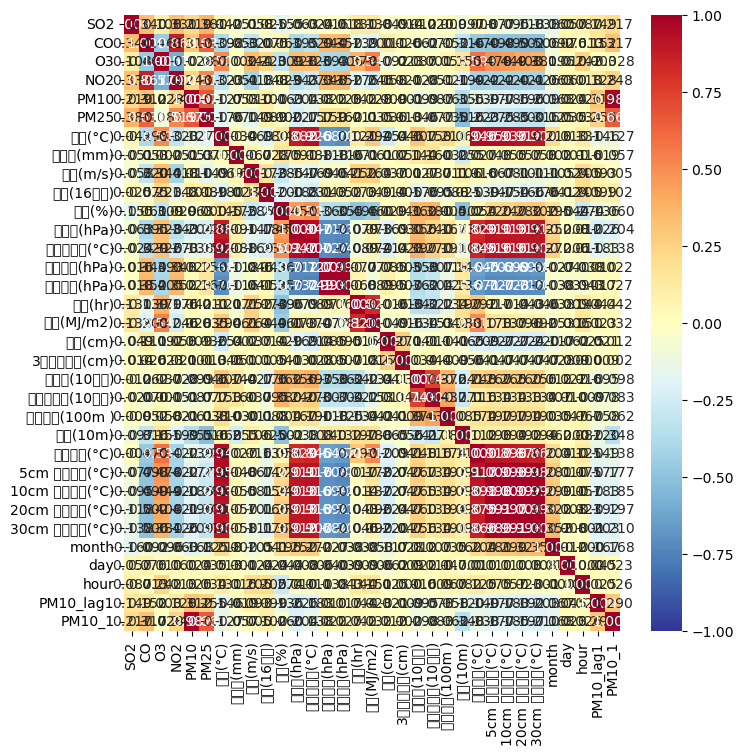

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8, 8))
sns.heatmap(df_21.corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값값
plt.show()